In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk

import re
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud

import sastrawi
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tensorflow.keras.preprocessing.sequence import pad_sequences

sns.set_palette('Set2')

In [2]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\RIO
[nltk_data]     BASTIAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
dwlr = nltk.downloader.Downloader()

for pkg in dwlr.corpora():
    dwlr._status_cache[pkg.id] = 'installed'

dwlr.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to C:\Users\RIO
[nltk_data]    |     BASTIAN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to C:\Users\RIO
[nltk_data]    |     BASTIAN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to C:\Users\RIO
[nltk_data]    |     BASTIAN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to C:\Users\RIO
[nltk_data]    |     BASTIAN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to C:\Users\RIO
[nltk_data]    |     BASTIAN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package m

True

# Load and explore data

In [5]:
dat = pd.read_csv('.Symptom2DiseaseID.csv', delimiter=';')

In [6]:
dat = dat.drop(['indeks'], axis=1)
dat.head()

,label,text
0,Psoriasis,"Saya telah mengalami ruam kulit di lengan, ka..."
1,Psoriasis,"Kulit saya mengelupas, terutama di lutut, sik..."
2,Psoriasis,"Saya telah mengalami nyeri sendi di jari, per..."
3,Psoriasis,"Ada debu seperti perak di kulit saya, terutam..."
4,Psoriasis,Kuku saya memiliki penyok atau lubang kecil d...


In [7]:
# check unique diseases(=labels)
dat['label'].value_counts()

 Psoriasis                          50
 Pembuluh mekar                     50
 penyakit ulkus peptikum            50
 reaksi obat                        50
 penyakit refluks gastroesofagus    50
 alergi                             50
 Infeksi saluran kemih              50
 Malaria                            50
 Penyakit kuning                    50
 spondylosis serviks                50
 Migrain                            50
 Hipertensi                         50
 Asma bronkial                      50
 Jerawat                            50
 Radang sendi                       50
 Wasir Dimorfik                     50
 Radang paru-paru                   50
 Flu biasa                          50
 Infeksi jamur                      50
 demam berdarah                     50
 Impetigo                           50
 Cacar air                          50
 Penyakit tipus                     50
 diabetes                           50
Name: label, dtype: int64

In [8]:
# the number of diseases
len(dat['label'].value_counts())

24

In [9]:
# check one example of text
dat['text'][0]

' Saya telah mengalami ruam kulit di lengan, kaki, dan dada saya selama beberapa minggu terakhir. Warnanya merah, gatal, dan tertutup bercak kering bersisik.'

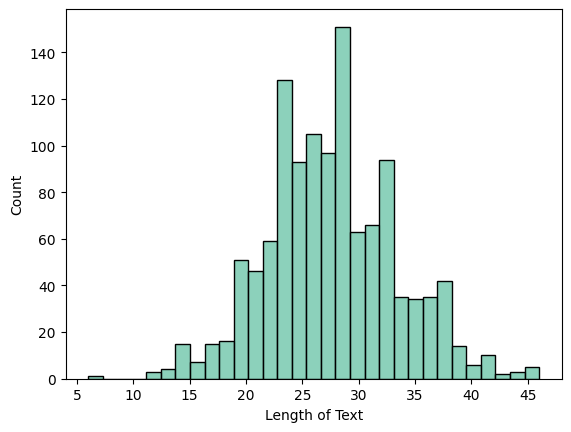

In [10]:
# check the length of text
text_length = dat['text'].apply(lambda x: len(x.split(' ')))

sns.histplot(text_length)
plt.xlabel('Length of Text')
plt.show()

In [171]:
stopwords.words('indonesian')

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

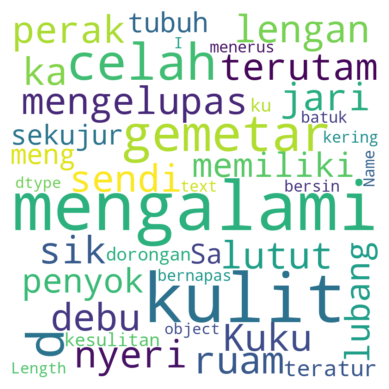

In [14]:
# wordcloud of symptom texts

# english_s = stopwords.words('english')
stop_words = set(stopwords.words('indonesian'))

# add some stop words
stop_words.update(["saya sudah", "saya", "suka"])

wordcloud = WordCloud(width = 800, 
                        height = 800, 
                        background_color ='white', 
                        stopwords=stop_words, 
                        min_font_size = 8).generate(str(dat['text']))

# display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Data preprocessing

## Label encoding

Before modeling, we need to encode the disease into numbers. Here I use the LabelEncoder from sklearn. You can also tokenize the disease and use the tokenizer to encode the disease, but you should be careful that some diseases contain more than one word and they could share the same words.

In [15]:
def label_encode(labels):
    label_encoder = LabelEncoder()
    label_encoder.fit(labels)
    label_sequences = label_encoder.transform(labels)
    return label_sequences

# test: random sample 5 labels in dat and corresponding sequences
for i in np.random.randint(0, len(dat['label']), 5):
    print(dat['label'][i], label_encode(dat['label'])[i])

dat['label_encoded'] = label_encode(dat['label'])

 Migrain 9
 Migrain 9
 alergi 17
 penyakit ulkus peptikum 21
 Penyakit kuning 11


In [16]:
dat.head()

,label,text,label_encoded
0,Psoriasis,"Saya telah mengalami ruam kulit di lengan, ka...",13
1,Psoriasis,"Kulit saya mengelupas, terutama di lutut, sik...",13
2,Psoriasis,"Saya telah mengalami nyeri sendi di jari, per...",13
3,Psoriasis,"Ada debu seperti perak di kulit saya, terutam...",13
4,Psoriasis,Kuku saya memiliki penyok atau lubang kecil d...,13


## Split data into train and validation

In [18]:
train_ratio = 0.8
# sample 80% of the data for training and 20% for validation for each label
train = dat.groupby('label_encoded', group_keys=False).apply(lambda x: x.sample(frac=train_ratio, random_state=42))
val = dat.drop(train.index)

train_texts = train['text'].values
train_labels = train['label_encoded'].values
val_texts = val['text'].values
val_labels = val['label_encoded'].values

train_texts.shape, train_labels.shape, val_texts.shape, val_labels.shape

((960,), (960,), (240,), (240,))

## Remove stop words
We have converted the disease label to integer. Now we will deal with the symptom texts to remove stop words that are provide little information, meanwhile generating tokens.

In [19]:
def remove_stopwords(texts):
    # first remove all punctuations 
    words = [re.split(r'[ ,.]+', text) for text in texts]

    # remove space and make all words lower case
    words = [[word.lower() for word in text if word != ''] for text in words]

    # remove stop words using nltk (or you can use your own stop words, see below)
    stop_words = set(stopwords.words('indonesian'))

    # add some stop words
    stop_words.update(["saya sudah", "saya", "suka"])

    words = [[word for word in text if word.lower() not in stop_words] for text in words]
    return words

print(train_texts[0])
# test the function
print(remove_stopwords(train_texts)[0])

 merasa sangat lelah dan batuk terus-menerus. Sulit bagi saya untuk mengatur napas, dan demam saya sangat tinggi. Saya juga mengeluarkan banyak lendir saat batuk
['lelah', 'batuk', 'terus-menerus', 'sulit', 'mengatur', 'napas', 'demam', 'mengeluarkan', 'lendir', 'batuk']


In [36]:
# # alternative way to remove stop words you defined

# def remove_stopwords(sentence):
#     stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
#     sentence = sentence.lower()
#     sentence_list = sentence.split()
#     sentence_list = [word for word in sentence_list if word not in stopwords]
#     return ' '.join(sentence_list)


## Visualize the size of words

We can find that the length of symptom description is shortened after stop words removal:

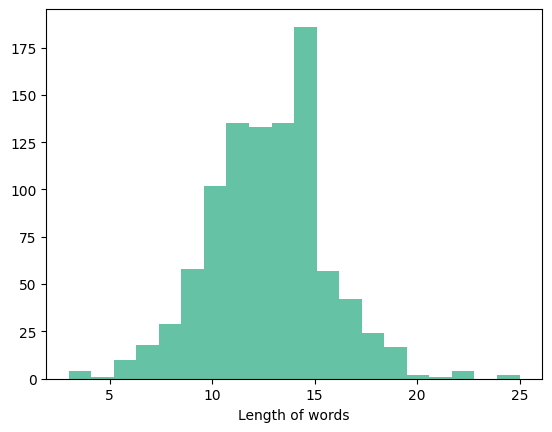

In [20]:
words_length = [len(w) for w in remove_stopwords(train_texts)]
plt.hist(words_length, bins=20)
plt.xlabel('Length of words')
plt.show()

## Tokenization and padding

In [21]:
# make a tokenizer
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(train_texts)

def tokenize_and_pad(words, tokenizer, max_len=50):
    # convert the text to sequences of integers
    sequences = tokenizer.texts_to_sequences(words)
    # pad the sequences using the maxlen to make all sequences the same length
    padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')
    return padded_sequences

# test the function
tokenize_and_pad(train_texts, tokenizer)[0]

array([ 11,   7,  26,   3,  21,  65,  74,  27, 101,   2,  25, 452, 220,
         3,  16,   2,   7,  22,   2,   9, 201,  14, 114,  50,  21,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

## Apply preprocessing to train and validation data
Note that the train and validation data should be preprocessed in the same way, especially using the same tokenizer.

In [22]:
train_sequences = tokenize_and_pad(remove_stopwords(train_texts), tokenizer)
train_labels = train_labels.reshape(-1, 1)

val_sequences = tokenize_and_pad(remove_stopwords(val_texts), tokenizer)
val_labels = val_labels.reshape(-1, 1)

print('train_sequences shape: ', train_sequences.shape)
print('train_labels shape: ', train_labels.shape)
print('val_sequences shape: ', val_sequences.shape)
print('val_labels shape: ', val_labels.shape)

train_sequences shape:  (960, 50)
train_labels shape:  (960, 1)
val_sequences shape:  (240, 50)
val_labels shape:  (240, 1)


# Build and train model

There are many model alternatives to predict a label from texts, such as Embedding, Embedding + CNN,  Embedding + LSTM, BERT, etc. I will try each of them and compare the performance using the validation data.


In [23]:
# define a function to visualize the training and validation loss and accuracy
def plot_graphs(history, metric):
    fig, ax = plt.subplots(figsize=(5, 3))
    ax.plot(history.history[metric])
    ax.plot(history.history['val_'+metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.title(metric)
    plt.show()

max_length = 50

Before building models, we need to clarify the input and output of the model. The input is the symptom description with a maximum length of 50 words. The output is one of the 24 diseases. For the neural network, the input shape is (None, 50) and the output shape is (None, 24)

## Embedding Neural Network

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 50, 128)           256000    
                                                                 
 global_average_pooling1d_12  (None, 128)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_41 (Dense)            (None, 128)               16512     
                                                                 
 dropout_44 (Dropout)        (None, 128)               0         
                                                                 
 dense_42 (Dense)            (None, 32)                4128      
                                                                 
 dense_43 (Dense)            (None, 24)                792       
                                                     

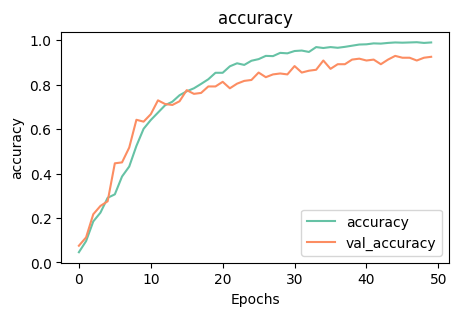

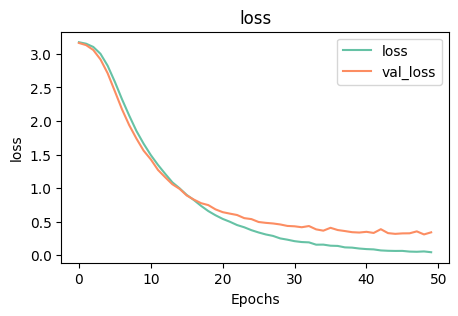

In [66]:
# build the model with embedding layer
model_embed = tf.keras.Sequential([
    tf.keras.layers.Embedding(2000, 128, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(24, activation='softmax')])

model_embed.summary()

model_embed.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# train the model
history = model_embed.fit(train_sequences, train_labels, epochs=50, validation_data=(val_sequences, val_labels))
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [67]:
# model validation accuracy
model_embed.evaluate(val_sequences, val_labels)

8/8 [==============================] - 0s 2ms/step - loss: 0.3392 - accuracy: 0.9250


[0.33915814757347107, 0.925000011920929]

## Convolutional Neural Network

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 50, 128)           256000    
                                                                 
 dropout_38 (Dropout)        (None, 50, 128)           0         
                                                                 
 conv1d_6 (Conv1D)           (None, 46, 256)           164096    
                                                                 
 global_average_pooling1d_11  (None, 256)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_39 (Dropout)        (None, 256)               0         
                                                                 
 dense_36 (Dense)            (None, 64)                16448     
                                                     

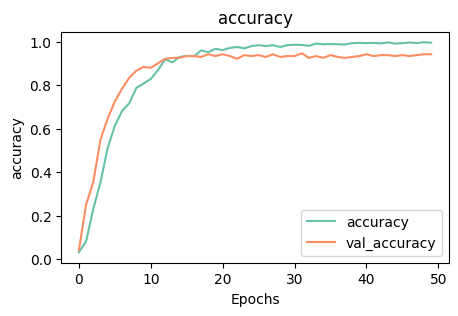

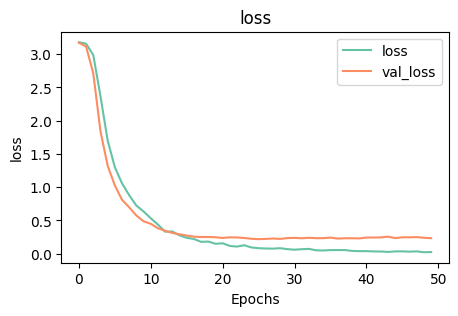

In [60]:
# build the model with convolutional layer, be careful with overfitting
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(2000, 128, input_length=max_length),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv1D(256, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(24, activation='softmax')])
model_conv.summary()

model_conv.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history = model_conv.fit(train_sequences, train_labels, epochs=50, validation_data=(val_sequences, val_labels))

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [61]:
# model validation accuracy
model_conv.evaluate(val_sequences, val_labels)

8/8 [==============================] - 0s 6ms/step - loss: 0.2330 - accuracy: 0.9417


[0.23300211131572723, 0.9416666626930237]

## LSTM

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 50, 128)           256000    
                                                                 
 dropout_41 (Dropout)        (None, 50, 128)           0         
                                                                 
 bidirectional_7 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dropout_42 (Dropout)        (None, 256)               0         
                                                                 
 dense_38 (Dense)            (None, 64)                16448     
                                                                 
 dense_39 (Dense)            (None, 32)                2080      
                                                     

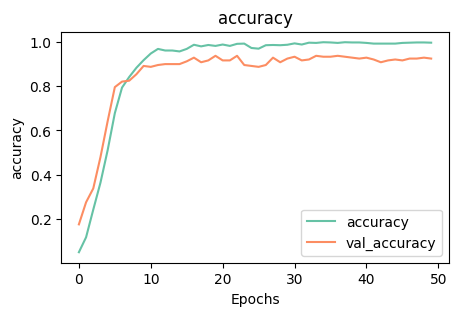

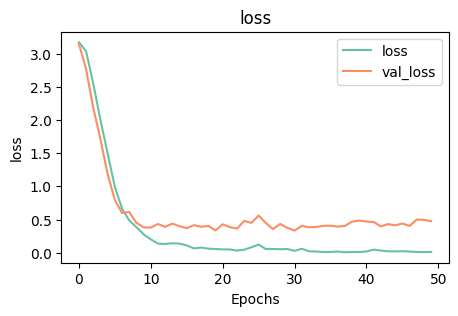

In [62]:
# build the model with LSTM layer, be careful with overfitting
tf.random.set_seed(42)
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(2000, 128, input_length=max_length),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(24, activation='softmax')])
model_lstm.summary()

model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history = model_lstm.fit(train_sequences, train_labels, epochs=50, validation_data=(val_sequences, val_labels))

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [63]:
# model validation accuracy
model_lstm.evaluate(val_sequences, val_labels)

8/8 [==============================] - 0s 23ms/step - loss: 0.4755 - accuracy: 0.9250


[0.4755452871322632, 0.925000011920929]

In [164]:
# make some text to describe the symptoms

# test_text = ['Kulit saya kering dan gatal. Saya bisa melihat beberapa ruam di kulit saya dan wajah saya menjadi merah dengan mudah.']
# test_text = ['Perut saya sakit dan saya merasa mual. Saya mengalami diare dan saya merasa lemah.']
test_text = ['bercak merah bersisik pada kulit, gatal, kering, pecah-pecah, dan berdarah pada kulit, sendi bengkak dan kaku, serta kelainan kuku.']

print(f"The symptom is: \n {test_text[0]}")

# preprocess the text using the function we defined above
test_sequences = tokenize_and_pad(remove_stopwords(test_text), tokenizer)

# predict the label
test_pred = model_conv.predict(test_sequences)

# get the top 3 disease labels with the highest probability
top_sort = np.argsort(test_pred[0])[::-1]
top_3 = np.argsort(test_pred[0])[-3:][::-1]

label_encoder = LabelEncoder().fit(dat['label'])
# map the label sequence to the label name
print('The top 3 possible diseases are: ', label_encoder.inverse_transform(top_3))

The symptom is: 
 bercak merah bersisik pada kulit, gatal, kering, pecah-pecah, dan berdarah pada kulit, sendi bengkak dan kaku, serta kelainan kuku.
1/1 [==============================] - 0s 19ms/step
The top 3 possible diseases are:  [' Psoriasis' ' Infeksi jamur' ' diabetes']


In [170]:
test_pred[0]

array([7.1534262e-10, 8.3507312e-06, 4.7728037e-14, 1.8033531e-11,
       2.5541345e-09, 2.5455204e-03, 2.0742069e-05, 1.4294665e-09,
       8.5859434e-14, 7.4867854e-09, 3.9376077e-06, 2.1667611e-12,
       1.4131760e-10, 9.9649328e-01, 1.8805927e-14, 4.5630615e-04,
       5.5587552e-08, 4.8738669e-11, 5.8375765e-10, 4.7141468e-04,
       8.4421888e-12, 2.3058028e-07, 6.7531538e-08, 8.3225537e-08],
      dtype=float32)

In [165]:
sortedPred = sorted(test_pred[0])[::-1]
for i, acc in enumerate(sortedPred):
    print(f"Class {top_sort[i]} with", ("%.17f" % acc).rstrip('0').rstrip('.'))

Class 13 with 0.99649327993392944
Class 5 with 0.00254552043043077
Class 19 with 0.00047141467803158
Class 15 with 0.00045630615204573
Class 6 with 0.00002074206895486
Class 1 with 0.00000835073115013
Class 10 with 0.00000393760774386
Class 21 with 0.00000023058028376
Class 23 with 0.00000008322553668
Class 22 with 0.0000000675315377
Class 16 with 0.00000005558755234
Class 9 with 0.00000000748678541
Class 4 with 0.00000000255413446
Class 7 with 0.00000000142946655
Class 0 with 0.00000000071534262
Class 18 with 0.00000000058375765
Class 12 with 0.0000000001413176
Class 17 with 0.00000000004873867
Class 3 with 0.00000000001803353
Class 20 with 0.00000000000844219
Class 11 with 0.00000000000216676
Class 8 with 0.00000000000008586
Class 2 with 0.00000000000004773
Class 14 with 0.00000000000001881


In [172]:
model_conv.save("./model_cnn.h5")